<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/!HW_15_Neural_Networks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK: Implement classification of the MNIST dataset using Convolutional layers.**

In [ ]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.regularizers import l2

import matplotlib.pyplot as plt

**Loading the MNIST data.**

In [ ]:
# Завантажуємо дані MNIST
(x_train, y_train), (x_val, y_val) = mnist.load_data()

**Preprocessing the data.**

In [ ]:
# Робимо обробку
x_train = x_train.reshape((60000, 28, 28, 1)).astype("float32") / 255
x_val = x_val.reshape((10000, 28, 28, 1)).astype("float32") / 255

**One-hot encoding for the class labels.**

In [ ]:
# Робимо One-hot encoding для міток класів
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

**Сreating a CNN model.**

In [ ]:
# Створюємо модель CNN
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

**Compiling the model.**

In [ ]:
# Робимо компіляцію
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Training the model.**

In [ ]:
# Навчаємо модель
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
938/938 [==============================] - 142s 150ms/step - loss: 0.3068 - accuracy: 0.9684 - val_loss: 0.1297 - val_accuracy: 0.9762
Epoch 2/5
938/938 [==============================] - 133s 142ms/step - loss: 0.1019 - accuracy: 0.9837 - val_loss: 0.1033 - val_accuracy: 0.9818
Epoch 3/5
938/938 [==============================] - 138s 147ms/step - loss: 0.0781 - accuracy: 0.9873 - val_loss: 0.1193 - val_accuracy: 0.9773
Epoch 4/5
938/938 [==============================] - 131s 139ms/step - loss: 0.0662 - accuracy: 0.9889 - val_loss: 0.0619 - val_accuracy: 0.9885
Epoch 5/5
938/938 [==============================] - 132s 140ms/step - loss: 0.0530 - accuracy: 0.9912 - val_loss: 0.0567 - val_accuracy: 0.9908


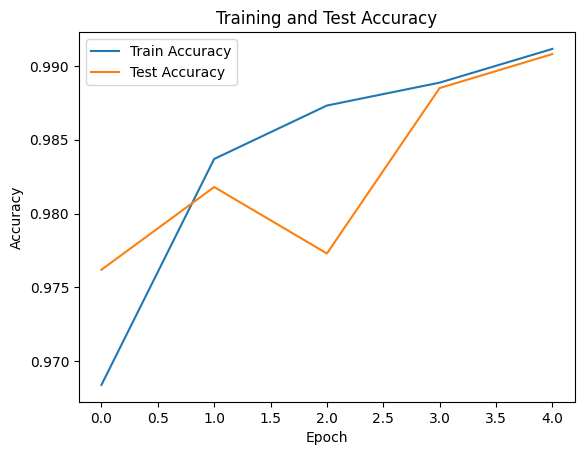

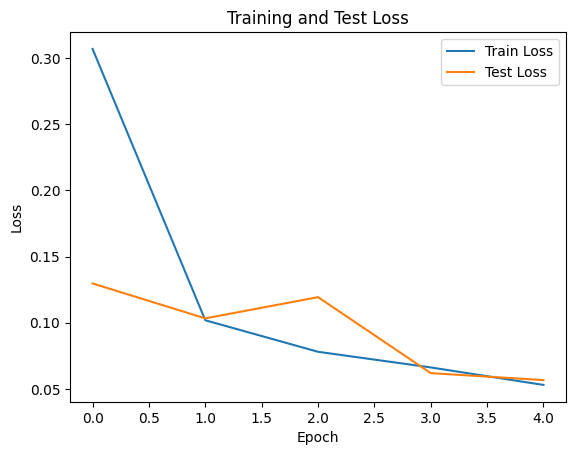

In [ ]:
# Fetching the training and validation accuracy history of the model:
# Отримуємо історію точності моделі навчання та валідації
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Fetching the training and validation loss history:
# Отримуємо історію втрат навчання та валідації
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Accuracy plot
# Графік для точності
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, label="Test Accuracy")
plt.title("Training and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Loss plot
# Графік для втрат
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Test Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

**Obtaining the model evaluation.**

In [ ]:
# Дивимось оцінку моделі
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print("Accuracy on the test data set: ", val_accuracy)
print("Losses on the test data set: ", val_loss)

313/313 [==============================] - 7s 22ms/step - loss: 0.0567 - accuracy: 0.9908
Accuracy on the test data set:  0.9908000230789185
Losses on the test data set:  0.056676916778087616


**We achieved good accuracy, so we can consider the model well-trained and capable of making accurate predictions on new data.**

In [ ]:
# Отримали хорошу точність, тож можна вважати, що наша модель навчена добре і здатна робити точні передбачення на нових даних